In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Packages

In [2]:
!pip install statsmodels
!pip install matplotlib
!pip install seaborn
!pip install lxml
!pip install openpyxl

^C


In [15]:
import os
import sys
from pathlib import Path
import pickle

from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
    
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [16]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from utils.preprocess import fix_binaries, fix_dttms

# Statics

In [17]:
PATH_REPO = Path(os.getcwd()).parent
PATH_RAW_DATA = PATH_REPO / "data/input/00_raw.csv"
PATH_PROCESS_DATA = PATH_REPO / "data/input/01_process.csv"
PATH_CATALOG = PATH_REPO / "statics/globals/catalog.xlsx"
NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Load Data

In [18]:
catalog = pd.read_excel(PATH_CATALOG)
raw_data = pd.read_csv(PATH_RAW_DATA, sep=";", low_memory=False, usecols=catalog["name"].tolist())
raw_data

,poblbarr_a,comuna_a,edad_a,consorig_a,previsio_a,estudio_a,est_civil_a,activida_a,paf_no_a,paf_diab_a,paf_tbcp_a,paf_hipe_a,paf_aler_a,pam_no_a,pam_diab_a,pam_tbcp_a,pam_hipe_a,pam_aler_a,pam_asma_a,pam_epil_a,pam_tiro_a,pam_card_a,pam_rena_a,paq_no_a,paq_cono_a,paq_miom_a,paq_infe_a,paq_liti_a,paq_cole_a,paq_apen_a,mecr_no_a,mecr_dur_a,mecr_des_a,mecr_nos_a,cigardia_a,alcohol_a,dro_no_a,dro_coca_a,dro_mari_a,dro_past_a,dro_amfe_a,dro_benz_a,anticonc_a,epre_nor_a,epre_mal_a,epre_pree_a,epre_diab_a,epre_snc_a,epre_car_a,epre_dow_a,epre_otr_a,epre_otc_a,ae_a,ap_a,ppr_a,pter_a,mnat_a,mneo_a,hv_a,embecto_a,cesaprev_a,rnmaypes_a,embgeme_a,inicontp_a,pesonorm_a,nrocontr_a,talla_a,grpsanc_a,grpsanr_a,estnutri_a,fecha_b,pesoactu_b,edagest_e,nrofetos_e,fechapar_f,pate_hip_g,pate_dia_g,pesonac_g,tallanac_g,fallece_g
0,LA ESPERANZA,PUENTE ALTO,39.0,PARTICULAR,4.0,5.0,1.0,5.0,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,VERDADERO,FALSO,1.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,2.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,4370.0,0.0,8.0,108.0,9.0,168,1.0,1.0,4.0,25-03-02,NaN,"37,6",1.0,25-03-02,FALSO,FALSO,3670.0,510.0,FALSO
1,V. NOCEDAL,PUENTE ALTO,24.0,SAN GERONIMO,6.0,3.0,2.0,2.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,1.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,4.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3280.0,0.0,12.0,64.0,6.0,155,1.0,2.0,3.0,13-05-02,73.0,"38,2",1.0,13-05-02,FALSO,FALSO,3520.0,495.0,FALSO
2,POB. EL RODEO,LA FLORIDA,28.0,LOS QUILLAYES,6.0,3.0,3.0,2.0,FALSO,VERDADERO,FALSO,VERDADERO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,1.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,4.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,46.0,12.0,149,1.0,1.0,2.0,06-03-02,61.0,39,1.0,07-03-02,FALSO,FALSO,3390.0,520.0,FALSO
3,V. PERPETUO FREIRE,LA FLORIDA,24.0,MAFFIOLETTI,1.0,4.0,3.0,2.0,FALSO,VERDADERO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,3.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,3.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,58.0,6.0,155,1.0,1.0,4.0,01-03-02,75.0,"38,1",1.0,02-03-02,FALSO,FALSO,2960.0,475.0,FALSO
4,POB. NVO. AMANECER,LA FLORIDA,25.0,LOS CASTAÃ‘OS,1.0,3.0,1.0,2.0,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,1.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,2.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,3770.0,0.0,22.0,53.0,6.0,161,1.0,1.0,2.0,26-04-02,70.0,41,1.0,26-04-02,FALSO,FALSO,4030.0,510.0,FALSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113063,EUGENIO MATTE,PUENTE ALTO,32.0,ALEJANDRO DEL RIO,1.0,2.0,1.0,2.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,1.0,1.0,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,4.0,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,11.0,110.0,7.0,166,1.0,1.0,4.0,27-Dec-18,113.0,40.4,1.0,27-De

In [19]:
for dt in catalog.dtype.unique():
    print(dt)
    mask = catalog.dtype == dt
    display(raw_data[[c for c in catalog[mask].name]])

cat


,activida_a,alcohol_a,anticonc_a,cigardia_a,comuna_a,consorig_a,est_civil_a,estnutri_a,estudio_a,grpsanc_a,grpsanr_a,poblbarr_a,previsio_a
0,5.0,1.0,2.0,1.0,PUENTE ALTO,PARTICULAR,1.0,4.0,5.0,1.0,1.0,LA ESPERANZA,4.0
1,2.0,1.0,4.0,1.0,PUENTE ALTO,SAN GERONIMO,2.0,3.0,3.0,1.0,2.0,V. NOCEDAL,6.0
2,2.0,1.0,4.0,1.0,LA FLORIDA,LOS QUILLAYES,3.0,2.0,3.0,1.0,1.0,POB. EL RODEO,6.0
3,2.0,1.0,3.0,3.0,LA FLORIDA,MAFFIOLETTI,3.0,4.0,4.0,1.0,1.0,V. PERPETUO FREIRE,1.0
4,2.0,1.0,2.0,1.0,LA FLORIDA,LOS CASTAÃ‘OS,1.0,2.0,3.0,1.0,1.0,POB. NVO. AMANECER,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113063,2.0,1.0,4.0,1.0,PUENTE ALTO,ALEJANDRO DEL RIO,1.0,4.0,2.0,1.0,1.0,EUGENIO MATTE,1.0
113064,2.0,1.0,4.0,1.0,PUENTE ALTO,ALEJANDRO DEL RIO,2.0,3.0,3.0,2.0,1.0,V. CORDILLERA,1.0
113065,6.0,1.0,4.0,1.0,PUENTE ALTO,ALEJANDRO DEL RIO,2.0,4.0,4.0,2.0,1.0,SAN MIGUEL IV,3.0
113066,2.0,1.0,4.0,1.0,PUENTE ALTO,VISTA HERMOSA,2.0,0.0,3.0,1.0,1.0,NaN,4.0


int


,ae_a,ap_a,cesaprev_a,edad_a,edagest_e,embecto_a,embgeme_a,hv_a,inicontp_a,mnat_a,mneo_a,nrocontr_a,nrofetos_e,ppr_a,pter_a
0,0.0,0.0,0.0,39.0,"37,6",0.0,0.0,2.0,8.0,0.0,0.0,9.0,1.0,0.0,2.0
1,0.0,0.0,0.0,24.0,"38,2",0.0,0.0,1.0,12.0,0.0,0.0,6.0,1.0,0.0,1.0
2,0.0,0.0,NaN,28.0,39,NaN,NaN,NaN,12.0,NaN,NaN,12.0,1.0,0.0,0.0
3,0.0,0.0,NaN,24.0,"38,1",NaN,NaN,NaN,23.0,NaN,NaN,6.0,1.0,0.0,0.0
4,0.0,0.0,0.0,25.0,41,0.0,0.0,1.0,22.0,0.0,0.0,6.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113063,1.0,0.0,NaN,32.0,40.4,NaN,NaN,0.0,11.0,0.0,0.0,7.0,1.0,0.0,0.0
113064,0.0,0.0,2.0,28.0,NaN,NaN,NaN,2.0,8.0,0.0,0.0,4.0,NaN,0.0,2.0
113065,0.0,0.0,NaN,24.0,NaN,NaN,NaN,1.0,19.0,0.0,0.0,13.0,NaN,0.0,1.0
113066,0.0,0.0,0.0,30.0,NaN,NaN,0.0,1.0,8.0,0.0,0.0,7.0,NaN,0.0,1.0


boolean


,dro_amfe_a,dro_benz_a,dro_coca_a,dro_mari_a,dro_no_a,dro_past_a,epre_car_a,epre_diab_a,epre_dow_a,epre_mal_a,epre_nor_a,epre_otc_a,epre_otr_a,epre_pree_a,epre_snc_a,fallece_g,mecr_des_a,mecr_dur_a,mecr_no_a,mecr_nos_a,paf_aler_a,paf_diab_a,paf_hipe_a,paf_no_a,paf_tbcp_a,pam_aler_a,pam_asma_a,pam_card_a,pam_diab_a,pam_epil_a,pam_hipe_a,pam_no_a,pam_rena_a,pam_tbcp_a,pam_tiro_a,paq_apen_a,paq_cole_a,paq_cono_a,paq_infe_a,paq_liti_a,paq_miom_a,paq_no_a,pate_dia_g,pate_hip_g
0,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO
1,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO
2,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO
3,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO
4,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113063,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO
113064,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,FALSO,FALSO,FALSO,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,NaN
113065,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,NaN
113066,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,NaN,FALSO,FALSO,FALSO,NaN,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,VERDADERO,FALSO,VERDADERO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,FALSO,NaN,NaN


dttm


,fecha_b,fechapar_f
0,25-03-02,25-03-02
1,13-05-02,13-05-02
2,06-03-02,07-03-02
3,01-03-02,02-03-02
4,26-04-02,26-04-02
...,...,...
113063,27-Dec-18,27-Dec-18
113064,27-Dec-18,NaN
113065,NaN,NaN
113066,NaN,NaN


float


,pesoactu_b,pesonac_g,pesonorm_a,rnmaypes_a,talla_a,tallanac_g
0,NaN,3670.0,108.0,4370.0,168,510.0
1,73.0,3520.0,64.0,3280.0,155,495.0
2,61.0,3390.0,46.0,NaN,149,520.0
3,75.0,2960.0,58.0,NaN,155,475.0
4,70.0,4030.0,53.0,3770.0,161,510.0
...,...,...,...,...,...,...
113063,113.0,3515.0,110.0,NaN,166,500.0
113064,112.0,NaN,112.0,4400.0,165,NaN
113065,NaN,NaN,65.0,3410.0,153,NaN
113066,NaN,NaN,70.0,3010.0,163,NaN


# Preprocess

- Var Fixs:
    1. [ok] Fix Binaries
    2. [ok] Fix dttms
- Filters & Drops
    1. [ok] Twins Filter (rows) > drop col
    2. [ok] Birth Date (rows)
    2. [ok] Missing Values (columns)
    3. [ok] STD (columns)
- Create
    1. [ok] IMC $= \dfrac{pesonorm_a (kg)}{talla_a^2 (m)}$
    2. [ok] GWG $= pesoactu_b - pesonorm_a$
    3. [ok] LGA $pesonac_g > P_{90}$
    4. [ok] SGA = $pesonac_g < P_{10}$
- Transform
    1. [ok] MVI
    2. [ok] Hot Encoding (pickle)
    3. [ok] Outliers (pickle)

## Var Fixs

In [20]:
data_fix = raw_data.copy()

# 1. boolean var fix
bin_cols = catalog.loc[catalog["dtype"]=="boolean","name"]
for c in bin_cols:
    data_fix[c] = data_fix[c].apply(lambda x: fix_binaries(x))
display(data_fix[bin_cols])
# 2. dtts fix
dtts_cols = catalog.loc[catalog["dtype"]=="dttm","name"]
for c in dtts_cols:
    data_fix[c] = data_fix[c].apply(lambda x: fix_dttms(x))
display(data_fix[dtts_cols])

,dro_amfe_a,dro_benz_a,dro_coca_a,dro_mari_a,dro_no_a,dro_past_a,epre_car_a,epre_diab_a,epre_dow_a,epre_mal_a,epre_nor_a,epre_otc_a,epre_otr_a,epre_pree_a,epre_snc_a,fallece_g,mecr_des_a,mecr_dur_a,mecr_no_a,mecr_nos_a,paf_aler_a,paf_diab_a,paf_hipe_a,paf_no_a,paf_tbcp_a,pam_aler_a,pam_asma_a,pam_card_a,pam_diab_a,pam_epil_a,pam_hipe_a,pam_no_a,pam_rena_a,pam_tbcp_a,pam_tiro_a,paq_apen_a,paq_cole_a,paq_cono_a,paq_infe_a,paq_liti_a,paq_miom_a,paq_no_a,pate_dia_g,pate_hip_g
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
113064,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
113065,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN
113066,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


,fecha_b,fechapar_f
0,2002-03-25,2002-03-25
1,2002-05-13,2002-05-13
2,2002-03-06,2002-03-07
3,2002-03-01,2002-03-02
4,2002-04-26,2002-04-26
...,...,...
113063,NaT,NaT
113064,NaT,NaT
113065,NaT,NaT
113066,NaT,NaT


## Filters & Drops

In [21]:
data_filter = data_fix.copy()
counter = 0
ni = len(data_filter)

# 1. Twins Filter (rows) > drop col
twin_col = "nrofetos_e" 
mask = (data_filter[twin_col] == 1)
data_filter = data_filter[mask]
data_filter.drop(columns=[twin_col], inplace=True)
nf  = len(data_filter)
print("total rows after twins filter: {} / {} ({}%)\n".format(nf,ni,nf*100/ni))

# 2. Birth Date (rows)
th_upper=31
th_lower=0
data_filter["_diff_days"] =  data_filter.apply(lambda x: (x["fechapar_f"] - x["fecha_b"]).days, axis=1)
ni = len(data_filter)
data_filter = data_filter.loc[(data_filter["_diff_days"] < 31) & (data_filter["_diff_days"] >= 0), :]
data_filter.drop(columns=["_diff_days", "fechapar_f", "fecha_b"], inplace=True)
nf = len(data_filter)
print("total rows after Birth Date filter: {} / {} ({}%)\n".format(nf,ni,nf*100/ni))

# 3. Missing Values (columns) +numerics +categorics
th = 0.15
for c in data_filter.columns:
    if data_filter[c].isna().mean() > th:
        counter +=1
        print("({}) Dropping {} due missing values".format(counter, c))
        data_filter.drop(columns=[c], inplace=True)
print("\n Missing values report")
display(data_filter.isna().mean().sort_values(ascending=False))

# 4. STD (columns)
th = 0
for c in data_filter.select_dtypes(include=NUMERICS).columns:
    if data_filter[c].std() <= th:
        counter +=1
        print("({}) Dropping {} due std".format(counter, c))
        data_filter.drop(columns=[c], inplace=True)
print("\n STD report")
display(data_filter.select_dtypes(include=NUMERICS).std().sort_values(ascending=True))


total rows after twins filter: 107498 / 113068 (95.07376092263063%)

total rows after Birth Date filter: 93947 / 107498 (87.3941840778433%)

(1) Dropping poblbarr_a due missing values
(2) Dropping epre_otc_a due missing values
(3) Dropping embecto_a due missing values
(4) Dropping cesaprev_a due missing values
(5) Dropping rnmaypes_a due missing values
(6) Dropping embgeme_a due missing values

 Missing values report


pesonorm_a    0.077246
pesoactu_b    0.070817
talla_a       0.048932
nrocontr_a    0.040278
inicontp_a    0.038000
                ...   
mecr_dur_a    0.008579
mecr_no_a     0.008579
paq_apen_a    0.008579
dro_no_a      0.008579
edagest_e     0.002885
Length: 71, dtype: float64


 STD report


dro_amfe_a      0.011813
epre_dow_a      0.022458
dro_benz_a      0.022458
pate_dia_g      0.026346
paq_infe_a      0.027404
                 ...    
edad_a         10.209345
pesoactu_b     16.554661
pesonorm_a     29.383329
tallanac_g     76.893785
pesonac_g     583.825994
Length: 67, dtype: float64

## Create new cols
1. IMC $= \dfrac{pesonorm_a (kg)}{talla_a^2 (m)}$
2. GWG $= pesoactu_b - pesonorm_a$
3. LGA $pesonac_g > P_{90}$
4. SGA = $pesonac_g < P_{10}$

In [22]:
def pre_edagest_e(x):
    x_ = str(x).split(",")[0]
    if not x_.isnumeric():
        return
    else:
        return int(x_)
def get_imc(pesonorm_a,talla_a):
    pesonorm_a = float(str(pesonorm_a).replace(",", ".").replace(" ", ""))
    talla_a = float(str(talla_a).replace(",", ".").replace(" ", ""))
    if talla_a == 0.0:
        return
    return float(pesonorm_a)/(float(talla_a)*0.01)**2

In [23]:
data_news = data_filter.copy()
cols_drops = ["pesonorm_a", "talla_a", "pesoactu_b", "pesonorm_a", "edagest_e"]
new_cols = ["IMC", "GWG", "LGA", "SGA"]
data_news["IMC"] = data_news.apply(lambda x: get_imc(x.pesonorm_a,x.talla_a), axis=1)
data_news["GWG"] = data_news["pesoactu_b"]-data_news["pesonorm_a"]

data_news["edagest_e"] = data_news["edagest_e"].apply(lambda x: pre_edagest_e(x))
q_lga = data_news["edagest_e"].quantile(0.9)
q_sga = data_news["edagest_e"].quantile(0.1)

data_news["LGA"] = data_news["edagest_e"].apply(lambda x: int(x>=q_lga))
data_news["SGA"] = data_news["edagest_e"].apply(lambda x: int(x<=q_sga))
data_news.drop(columns=cols_drops, inplace=True)
data_news[new_cols].describe()

,IMC,GWG,LGA,SGA
count,85740.000000,81257.000000,93947.000000,93947.000000
mean,37.443937,12.108655,0.320181,0.099716
std,2177.074514,29.433882,0.466548,0.299622
min,0.000000,-893.000000,0.000000,0.000000
25%,22.189349,9.000000,0.000000,0.000000
50%,24.690405,13.000000,0.000000,0.000000
75%,28.353057,17.000000,1.000000,0.000000
max,630000.000000,837.000000,1.000000,1.000000


## Transform + Bonus = extra drops and fix comuna

In [24]:
def clean_str(val):
    specials = {"ã‘uã‘oa": "ñuñoa", "peã‘alolen": "peñalolen", "otra regiã³n": "otra región", "estaciã“n central": "estación central"}
    spanish = {"ñ": "n", "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u"}
    if not isinstance(val, str):
        return val
    val_ = val.lower()
    if val_ in specials:
        val_ = specials[val_]
    
    for k in spanish:
        val_.replace(k, spanish[k])
    
    return val_

### Get Comunas

In [25]:
comuna_name = "comuna_a"
path = PATH_REPO / "data/models/comunas.pkl"
comunas = data_news[comuna_name].apply(lambda x: clean_str(x)).unique().tolist()
with open(path, "wb") as file_to_store:
    pickle.dump(comunas, file_to_store)

### Continue Transform

In [26]:
def clean_categorics(val):
    if isinstance(val, str):
        return clean_str(val)
    else:
        return int(val)

In [36]:
data_t = data_news.copy()
extra_drops = ["consorig_a"]
data_t.drop(columns=extra_drops, inplace=True)

# MVI
print("\n >> MISSING VALUES")

numeric_imputer = SimpleImputer(strategy='mean')
mask = catalog.dtype.isin(["float", "int"])
numeric_features = [c for c in catalog[mask].name if c in data_t.columns] + ["GWG", "IMC"]
print("Numeric features ({}): {}".format(len(numeric_features), numeric_features))
data_t[numeric_features] = numeric_imputer.fit_transform(data_t[numeric_features])
display(data_t[numeric_features])

categoric_imputer = SimpleImputer(strategy='most_frequent')
mask = catalog.dtype.isin(["cat"])
categoric_features = [c for c in catalog[mask].name if c in data_t.columns]
data_t[categoric_features] = categoric_imputer.fit_transform(data_t[categoric_features])
for f in categoric_features:
    data_t[f] = data_t[f].apply(lambda x: clean_categorics(x))
print("Categoric features ({}): {}".format(len(categoric_features), categoric_features))
display(data_t[categoric_features])

bool_imputer = SimpleImputer(strategy='most_frequent')
mask = catalog.dtype.isin(["boolean"])
bool_features = [c for c in catalog[mask].name if c in data_t.columns] + ["LGA", "SGA"]
data_t[bool_features] = categoric_imputer.fit_transform(data_t[bool_features])
for f in bool_features:
    data_t[f] = data_t[f].astype(int)
print("Bool features ({}): {}".format(len(bool_features), bool_features) )
display(data_t[bool_features])

print("Missing Values Report")
display(data_t.isna().mean().sort_values(ascending=False))

# Outliers 
print("\n >> OUTLIERS")


for c in numeric_features:
    
    std = data_t[c].std()
    mean = data_t[c].mean()
    
    upper = mean + 2*std
    lower = mean - 2*std
    
    mask = (data_t[c] < lower) | (data_t[c] > upper)
    n_ol = len(data_t[mask])
    
    data_t.loc[mask, c] = mean
    
    mask_post = (data_t[c] < lower) | (data_t[c] > upper)
    n_ol_post = len(data_t[mask_post])
    
    print("Column {} have {} / {} ({} %) of data as outliers.".format(c, n_ol, len(data_t),n_ol / len(data_t)))
    print("upper: {}, lower: {}, mean (imputate value): {}".format( upper, lower, mean))
    print("\t Now is: {} %".format(n_ol_post / len(data_t)))

# Hot Encoding (pickle)
print("\n >> ONE HOT ENCODING")


data_t.reset_index(inplace=True, drop=True)
enc_name = "categoric_oneHotEncoder"
path = PATH_REPO / "data/models/{}.pkl".format(enc_name)
enc = OneHotEncoder(drop='first', dtype=int, min_frequency=0.01)
one_hot_values = pd.DataFrame(enc.fit_transform(data_t[categoric_features]).toarray(), columns=enc.get_feature_names_out())
data_t.drop(columns=categoric_features, inplace=True)
data_t = data_t.join(one_hot_values)
with open(path, "wb") as file_to_store:
    pickle.dump(enc, file_to_store)
    
dummy_cols = enc.get_feature_names_out().tolist()
display(data_t[dummy_cols])

print("\n >> SANITY CHECK")

all_features = dummy_cols + numeric_features + bool_features

for c in data_t.columns:
    if c not in all_features:
        print(c)
print("Total cols in all features ({}) == data columns ({}): {}".format(len(all_features), len(data_t.columns), len(all_features)==len(data_t.columns) ))

# Drop "_g" columns 

block_list = ["pate_dia_g", "pate_hip_g"]
for c in data_t.columns:
    if "_g" in c and c not in block_list:
        print("dropping col", c)
        data_t.drop(columns=[c], inplace=True)
        
    

data_t


 >> MISSING VALUES
Numeric features (14): ['ae_a', 'ap_a', 'edad_a', 'hv_a', 'inicontp_a', 'mnat_a', 'mneo_a', 'nrocontr_a', 'pesonac_g', 'ppr_a', 'pter_a', 'tallanac_g', 'GWG', 'IMC']


,ae_a,ap_a,edad_a,hv_a,inicontp_a,mnat_a,mneo_a,nrocontr_a,pesonac_g,ppr_a,pter_a,tallanac_g,GWG,IMC
0,0.00000,0.000000,39.000000,2.000000,8.000000,0.000000,0.000000,9.000000,3670.0,0.000000,2.000000,510.0,12.108655,38.265306
1,0.00000,0.000000,24.000000,1.000000,12.000000,0.000000,0.000000,6.000000,3520.0,0.000000,1.000000,495.0,9.000000,26.638918
2,0.00000,0.000000,28.000000,1.004386,12.000000,0.009408,0.008558,12.000000,3390.0,0.000000,0.000000,520.0,15.000000,20.719787
3,0.00000,0.000000,24.000000,1.004386,23.000000,0.009408,0.008558,6.000000,2960.0,0.000000,0.000000,475.0,17.000000,24.141519
4,0.00000,0.000000,25.000000,1.000000,22.000000,0.000000,0.000000,6.000000,4030.0,0.000000,1.000000,510.0,17.000000,20.446742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98667,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,3700.0,0.068071,0.961308,510.0,12.108655,37.443937
98668,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,3045.0,0.068071,0.961308,470.0,12.108655,37.443937
98669,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,3880.0,0.068071,0.961308,520.0,12.108655,37.443937
98727,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,3670.0,0.068071,0.961308,500.0,12.108655,37.443937


Categoric features (11): ['activida_a', 'alcohol_a', 'anticonc_a', 'cigardia_a', 'comuna_a', 'est_civil_a', 'estnutri_a', 'estudio_a', 'grpsanc_a', 'grpsanr_a', 'previsio_a']


,activida_a,alcohol_a,anticonc_a,cigardia_a,comuna_a,est_civil_a,estnutri_a,estudio_a,grpsanc_a,grpsanr_a,previsio_a
0,5,1,2,1,puente alto,1,4,5,1,1,4
1,2,1,4,1,puente alto,2,3,3,1,2,6
2,2,1,4,1,la florida,3,2,3,1,1,6
3,2,1,3,3,la florida,3,4,4,1,1,1
4,2,1,2,1,la florida,1,2,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
98667,2,1,4,1,puente alto,3,2,3,1,1,1
98668,2,1,4,1,puente alto,3,2,3,1,1,1
98669,2,1,4,1,puente alto,3,2,3,1,1,1
98727,2,1,4,1,puente alto,3,2,3,1,1,1


Bool features (45): ['dro_amfe_a', 'dro_benz_a', 'dro_coca_a', 'dro_mari_a', 'dro_no_a', 'dro_past_a', 'epre_car_a', 'epre_diab_a', 'epre_dow_a', 'epre_mal_a', 'epre_nor_a', 'epre_otr_a', 'epre_pree_a', 'epre_snc_a', 'fallece_g', 'mecr_des_a', 'mecr_dur_a', 'mecr_no_a', 'mecr_nos_a', 'paf_aler_a', 'paf_diab_a', 'paf_hipe_a', 'paf_no_a', 'paf_tbcp_a', 'pam_aler_a', 'pam_asma_a', 'pam_card_a', 'pam_diab_a', 'pam_epil_a', 'pam_hipe_a', 'pam_no_a', 'pam_rena_a', 'pam_tbcp_a', 'pam_tiro_a', 'paq_apen_a', 'paq_cole_a', 'paq_cono_a', 'paq_infe_a', 'paq_liti_a', 'paq_miom_a', 'paq_no_a', 'pate_dia_g', 'pate_hip_g', 'LGA', 'SGA']


,dro_amfe_a,dro_benz_a,dro_coca_a,dro_mari_a,dro_no_a,dro_past_a,epre_car_a,epre_diab_a,epre_dow_a,epre_mal_a,epre_nor_a,epre_otr_a,epre_pree_a,epre_snc_a,fallece_g,mecr_des_a,mecr_dur_a,mecr_no_a,mecr_nos_a,paf_aler_a,paf_diab_a,paf_hipe_a,paf_no_a,paf_tbcp_a,pam_aler_a,pam_asma_a,pam_card_a,pam_diab_a,pam_epil_a,pam_hipe_a,pam_no_a,pam_rena_a,pam_tbcp_a,pam_tiro_a,paq_apen_a,paq_cole_a,paq_cono_a,paq_infe_a,paq_liti_a,paq_miom_a,paq_no_a,pate_dia_g,pate_hip_g,LGA,SGA
0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98667,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
98668,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
98669,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
98727,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


Missing Values Report


SGA           0.0
paq_liti_a    0.0
pam_card_a    0.0
pam_rena_a    0.0
paq_no_a      0.0
             ... 
anticonc_a    0.0
dro_benz_a    0.0
dro_amfe_a    0.0
dro_past_a    0.0
comuna_a      0.0
Length: 70, dtype: float64


 >> OUTLIERS
Column ae_a have 2902 / 93947 (0.03088975699064366 %) of data as outliers.
upper: 1.3605045898825319, lower: -0.9488236474673771, mean (imputate value): 0.20584047120757734
	 Now is: 0.0 %
Column ap_a have 198 / 93947 (0.002107571290195536 %) of data as outliers.
upper: 0.16076424408704237, lower: -0.1549382471942407, mean (imputate value): 0.002912998446400829
	 Now is: 0.0 %
Column edad_a have 6938 / 93947 (0.07385014955240721 %) of data as outliers.
upper: 47.554873247176715, lower: 6.893049794233626, mean (imputate value): 27.22396152070517
	 Now is: 0.0 %
Column hv_a have 2971 / 93947 (0.03162421365237847 %) of data as outliers.
upper: 3.2664441517522356, lower: -1.2576721262217134, mean (imputate value): 1.004386012765261
	 Now is: 0.0 %
Column inicontp_a have 5190 / 93947 (0.055243914121792075 %) of data as outliers.
upper: 23.805732106422717, lower: 0.5636096508827926, mean (imputate value): 12.184670878652755
	 Now is: 0.0 %
Column mnat_a have 823 / 93947 (0.0087

,activida_a_1,activida_a_2,activida_a_3,activida_a_4,activida_a_5,activida_a_6,activida_a_infrequent_sklearn,alcohol_a_2,alcohol_a_infrequent_sklearn,anticonc_a_3,anticonc_a_4,anticonc_a_5,anticonc_a_infrequent_sklearn,cigardia_a_2,cigardia_a_3,cigardia_a_infrequent_sklearn,comuna_a_la pintana,comuna_a_pirque,comuna_a_puente alto,comuna_a_san jose maipo,comuna_a_infrequent_sklearn,est_civil_a_1,est_civil_a_2,est_civil_a_3,est_civil_a_4,estnutri_a_1,estnutri_a_2,estnutri_a_3,estnutri_a_4,estudio_a_1,estudio_a_2,estudio_a_3,estudio_a_4,estudio_a_5,grpsanc_a_1,grpsanc_a_2,grpsanc_a_3,grpsanc_a_4,grpsanc_a_5,grpsanr_a_1,grpsanr_a_2,grpsanr_a_5,grpsanr_a_infrequent_sklearn,previsio_a_1,previsio_a_2,previsio_a_3,previsio_a_4,previsio_a_5,previsio_a_6
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93942,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93943,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93944,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93945,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0



 >> SANITY CHECK
Total cols in all features (108) == data columns (108): True
dropping col pesonac_g
dropping col tallanac_g
dropping col fallece_g


,edad_a,paf_no_a,paf_diab_a,paf_tbcp_a,paf_hipe_a,paf_aler_a,pam_no_a,pam_diab_a,pam_tbcp_a,pam_hipe_a,pam_aler_a,pam_asma_a,pam_epil_a,pam_tiro_a,pam_card_a,pam_rena_a,paq_no_a,paq_cono_a,paq_miom_a,paq_infe_a,paq_liti_a,paq_cole_a,paq_apen_a,mecr_no_a,mecr_dur_a,mecr_des_a,mecr_nos_a,dro_no_a,dro_coca_a,dro_mari_a,dro_past_a,dro_amfe_a,dro_benz_a,epre_nor_a,epre_mal_a,epre_pree_a,epre_diab_a,epre_snc_a,epre_car_a,epre_dow_a,epre_otr_a,ae_a,ap_a,ppr_a,pter_a,mnat_a,mneo_a,hv_a,inicontp_a,nrocontr_a,pate_hip_g,pate_dia_g,IMC,GWG,LGA,SGA,activida_a_1,activida_a_2,activida_a_3,activida_a_4,activida_a_5,activida_a_6,activida_a_infrequent_sklearn,alcohol_a_2,alcohol_a_infrequent_sklearn,anticonc_a_3,anticonc_a_4,anticonc_a_5,anticonc_a_infrequent_sklearn,cigardia_a_2,cigardia_a_3,cigardia_a_infrequent_sklearn,comuna_a_la pintana,comuna_a_pirque,comuna_a_puente alto,comuna_a_san jose maipo,comuna_a_infrequent_sklearn,est_civil_a_1,est_civil_a_2,est_civil_a_3,est_civil_a_4,estnutri_a_1,estnutri_a_2,estnutri_a_3,estnutri_a_4,estudio_a_1,estudio_a_2,estudio_a_3,estudio_a_4,estudio_a_5,grpsanc_a_1,grpsanc_a_2,grpsanc_a_3,grpsanc_a_4,grpsanc_a_5,grpsanr_a_1,grpsanr_a_2,grpsanr_a_5,grpsanr_a_infrequent_sklearn,previsio_a_1,previsio_a_2,previsio_a_3,previsio_a_4,previsio_a_5,previsio_a_6
0,39.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,8.000000,9.000000,0,0,38.265306,12.108655,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,24.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,12.000000,6.000000,0,0,26.638918,9.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,28.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.009408,0.008558,1.004386,12.000000,12.000000,0,0,20.719787,15.000000,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,24.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.009408,0.008558,1.004386,23.000000,6.000000,0,0,24.141519,17.000000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,25.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,6.000000,0,0,20.446742,17.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93942,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.682786,0,0,37.443937,12.108655,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93943,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.682786,0,0,37.443937,12.108655,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93944,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.682786,0,

# Final 1: Save Data

In [38]:
# Rename
targets = ["LGA", "SGA", "hipertension", "diabetes"]
data_final = data_t.copy()
data_final.rename(columns={"pate_hip_g": "hipertension","pate_dia_g": "diabetes"}, inplace=True)

features = [c for c in data_final.columns if c not in targets]
data_final = data_final[targets + features]

numeric_features_final = [c for c in numeric_features if c in features]
print("Total numeric features:", len(numeric_features_final))
display(data_final[numeric_features_final])

categoric_features_final = [c for c in dummy_cols + bool_features if c in features]
print("Total categoric features:", len(categoric_features_final))
display(data_final[categoric_features_final])



path = PATH_REPO / "data/models/features_names.pkl" 
with open(path, "wb") as file_to_store:
    pickle.dump(features, file_to_store)
    
path = PATH_REPO / "data/models/categoric_features_names.pkl" 
with open(path, "wb") as file_to_store:
    pickle.dump(categoric_features_final, file_to_store)

path = PATH_REPO / "data/models/numeric_features_names.pkl" 
with open(path, "wb") as file_to_store:
    pickle.dump(numeric_features_final, file_to_store)

path = PATH_REPO / "data/models/targets_names.pkl" 
with open(path, "wb") as file_to_store:
    pickle.dump(targets, file_to_store)

data_final.to_csv(PATH_PROCESS_DATA)
data_final

Total numeric features: 12


,ae_a,ap_a,edad_a,hv_a,inicontp_a,mnat_a,mneo_a,nrocontr_a,ppr_a,pter_a,GWG,IMC
0,0.00000,0.000000,39.000000,2.000000,8.000000,0.000000,0.000000,9.000000,0.000000,2.000000,12.108655,38.265306
1,0.00000,0.000000,24.000000,1.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1.000000,9.000000,26.638918
2,0.00000,0.000000,28.000000,1.004386,12.000000,0.009408,0.008558,12.000000,0.000000,0.000000,15.000000,20.719787
3,0.00000,0.000000,24.000000,1.004386,23.000000,0.009408,0.008558,6.000000,0.000000,0.000000,17.000000,24.141519
4,0.00000,0.000000,25.000000,1.000000,22.000000,0.000000,0.000000,6.000000,0.000000,1.000000,17.000000,20.446742
...,...,...,...,...,...,...,...,...,...,...,...,...
93942,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,0.068071,0.961308,12.108655,37.443937
93943,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,0.068071,0.961308,12.108655,37.443937
93944,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,0.068071,0.961308,12.108655,37.443937
93945,0.20584,0.002913,27.223962,1.004386,12.184671,0.009408,0.008558,7.682786,0.068071,0.961308,12.108655,37.443937


Total categoric features: 89


,activida_a_1,activida_a_2,activida_a_3,activida_a_4,activida_a_5,activida_a_6,activida_a_infrequent_sklearn,alcohol_a_2,alcohol_a_infrequent_sklearn,anticonc_a_3,anticonc_a_4,anticonc_a_5,anticonc_a_infrequent_sklearn,cigardia_a_2,cigardia_a_3,cigardia_a_infrequent_sklearn,comuna_a_la pintana,comuna_a_pirque,comuna_a_puente alto,comuna_a_san jose maipo,comuna_a_infrequent_sklearn,est_civil_a_1,est_civil_a_2,est_civil_a_3,est_civil_a_4,estnutri_a_1,estnutri_a_2,estnutri_a_3,estnutri_a_4,estudio_a_1,estudio_a_2,estudio_a_3,estudio_a_4,estudio_a_5,grpsanc_a_1,grpsanc_a_2,grpsanc_a_3,grpsanc_a_4,grpsanc_a_5,grpsanr_a_1,grpsanr_a_2,grpsanr_a_5,grpsanr_a_infrequent_sklearn,previsio_a_1,previsio_a_2,previsio_a_3,previsio_a_4,previsio_a_5,previsio_a_6,dro_amfe_a,dro_benz_a,dro_coca_a,dro_mari_a,dro_no_a,dro_past_a,epre_car_a,epre_diab_a,epre_dow_a,epre_mal_a,epre_nor_a,epre_otr_a,epre_pree_a,epre_snc_a,mecr_des_a,mecr_dur_a,mecr_no_a,mecr_nos_a,paf_aler_a,paf_diab_a,paf_hipe_a,paf_no_a,paf_tbcp_a,pam_aler_a,pam_asma_a,pam_card_a,pam_diab_a,pam_epil_a,pam_hipe_a,pam_no_a,pam_rena_a,pam_tbcp_a,pam_tiro_a,paq_apen_a,paq_cole_a,paq_cono_a,paq_infe_a,paq_liti_a,paq_miom_a,paq_no_a
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93942,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
93943,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
93944,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
93945,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


,LGA,SGA,hipertension,diabetes,edad_a,paf_no_a,paf_diab_a,paf_tbcp_a,paf_hipe_a,paf_aler_a,pam_no_a,pam_diab_a,pam_tbcp_a,pam_hipe_a,pam_aler_a,pam_asma_a,pam_epil_a,pam_tiro_a,pam_card_a,pam_rena_a,paq_no_a,paq_cono_a,paq_miom_a,paq_infe_a,paq_liti_a,paq_cole_a,paq_apen_a,mecr_no_a,mecr_dur_a,mecr_des_a,mecr_nos_a,dro_no_a,dro_coca_a,dro_mari_a,dro_past_a,dro_amfe_a,dro_benz_a,epre_nor_a,epre_mal_a,epre_pree_a,epre_diab_a,epre_snc_a,epre_car_a,epre_dow_a,epre_otr_a,ae_a,ap_a,ppr_a,pter_a,mnat_a,mneo_a,hv_a,inicontp_a,nrocontr_a,IMC,GWG,activida_a_1,activida_a_2,activida_a_3,activida_a_4,activida_a_5,activida_a_6,activida_a_infrequent_sklearn,alcohol_a_2,alcohol_a_infrequent_sklearn,anticonc_a_3,anticonc_a_4,anticonc_a_5,anticonc_a_infrequent_sklearn,cigardia_a_2,cigardia_a_3,cigardia_a_infrequent_sklearn,comuna_a_la pintana,comuna_a_pirque,comuna_a_puente alto,comuna_a_san jose maipo,comuna_a_infrequent_sklearn,est_civil_a_1,est_civil_a_2,est_civil_a_3,est_civil_a_4,estnutri_a_1,estnutri_a_2,estnutri_a_3,estnutri_a_4,estudio_a_1,estudio_a_2,estudio_a_3,estudio_a_4,estudio_a_5,grpsanc_a_1,grpsanc_a_2,grpsanc_a_3,grpsanc_a_4,grpsanc_a_5,grpsanr_a_1,grpsanr_a_2,grpsanr_a_5,grpsanr_a_infrequent_sklearn,previsio_a_1,previsio_a_2,previsio_a_3,previsio_a_4,previsio_a_5,previsio_a_6
0,0,0,0,0,39.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,8.000000,9.000000,38.265306,12.108655,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,24.000000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,12.000000,6.000000,26.638918,9.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,28.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.009408,0.008558,1.004386,12.000000,12.000000,20.719787,15.000000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,24.000000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,0.000000,0.009408,0.008558,1.004386,23.000000,6.000000,24.141519,17.000000,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,25.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,22.000000,6.000000,20.446742,17.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93942,0,0,0,0,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.682786,37.443937,12.108655,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93943,1,0,0,0,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.682786,37.443937,12.108655,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
93944,1,0,0,0,27.223962,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.20584,0.002913,0.068071,0.961308,0.009408,0.008558,1.004386,12.184671,7.6

# Final 2: Balanced data and save

In [39]:
th = 0.05
data_dicts = {} 

for e in targets:
    
    to_drop = [c for c in targets if c !=e]
    
    data_balanced = data_final.copy()
    
    data_balanced.drop(columns=to_drop, inplace=True)
    
    pp = data_balanced[e].mean()
    pos_data = data_balanced[data_final[e] > 0] 
    n = len(pos_data)
    print("\n >> Target {} is {} / {} ({} %) \n".format(e, n, len(data_balanced), pp*100))
    if pp < th:
        print("data is imbalanced")
        n_target = int(n*(1-th)/th)
        print("n0 target =", n_target)
        neg_data_sample = data_balanced[data_balanced[e]==0].sample(n_target)
        data_balanced = pos_data.append(neg_data_sample)
        pp_new = data_balanced[e].mean()
        print("now {} is {} / {} ({} %)".format(e, n, len(data_balanced), pp_new*100))
    
    path = PATH_PROCESS_DATA.parent / "01_preprocess_balanced_{}.csv".format(e)
    print("saving data in", path)
    data_balanced.to_csv(path)
    data_dicts[e] = data_balanced


 >> Target LGA is 30080 / 93947 (32.018052731859456 %) 

saving data in D:\python\optiGWG\data\input\01_preprocess_balanced_LGA.csv

 >> Target SGA is 9368 / 93947 (9.971579720480698 %) 

saving data in D:\python\optiGWG\data\input\01_preprocess_balanced_SGA.csv

 >> Target hipertension is 459 / 93947 (0.48857334454532875 %) 

data is imbalanced
n0 target = 8720
now hipertension is 459 / 9179 (5.0005447216472385 %)
saving data in D:\python\optiGWG\data\input\01_preprocess_balanced_hipertension.csv

 >> Target diabetes is 64 / 93947 (0.0681235164507648 %) 

data is imbalanced
n0 target = 1215
now diabetes is 64 / 1279 (5.003909304143862 %)
saving data in D:\python\optiGWG\data\input\01_preprocess_balanced_diabetes.csv


# Logit Model


 Target: LGA
Accuracy: 69.99467802022352 %
B. Accuracy: 57.08177241880221 %

 Target: SGA
Accuracy: 90.25013304949441 %
B. Accuracy: 51.73183772617212 %

 Target: hipertension
Accuracy: 95.24328249818446 %
B. Accuracy: 58.49231197756667 %

 Target: diabetes
Accuracy: 95.57291666666666 %
B. Accuracy: 61.21974675428754 %


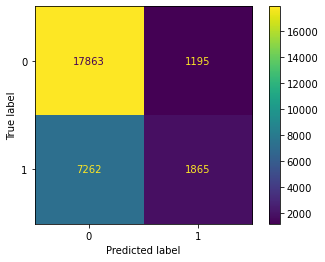

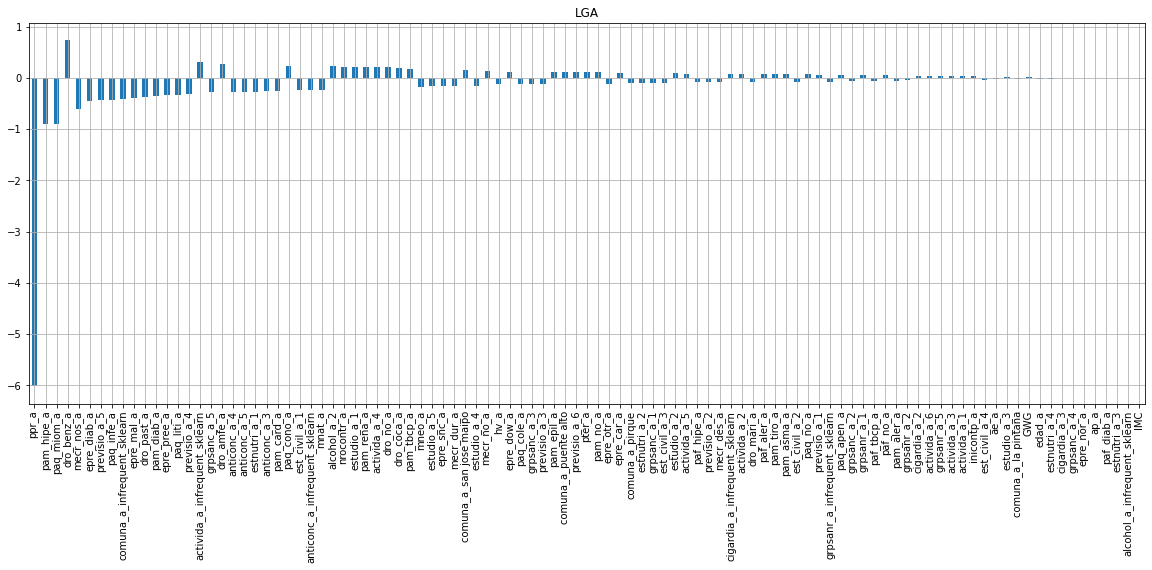

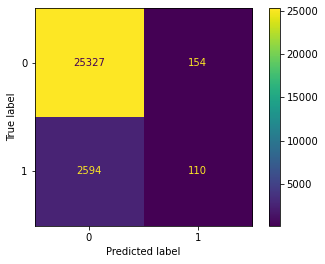

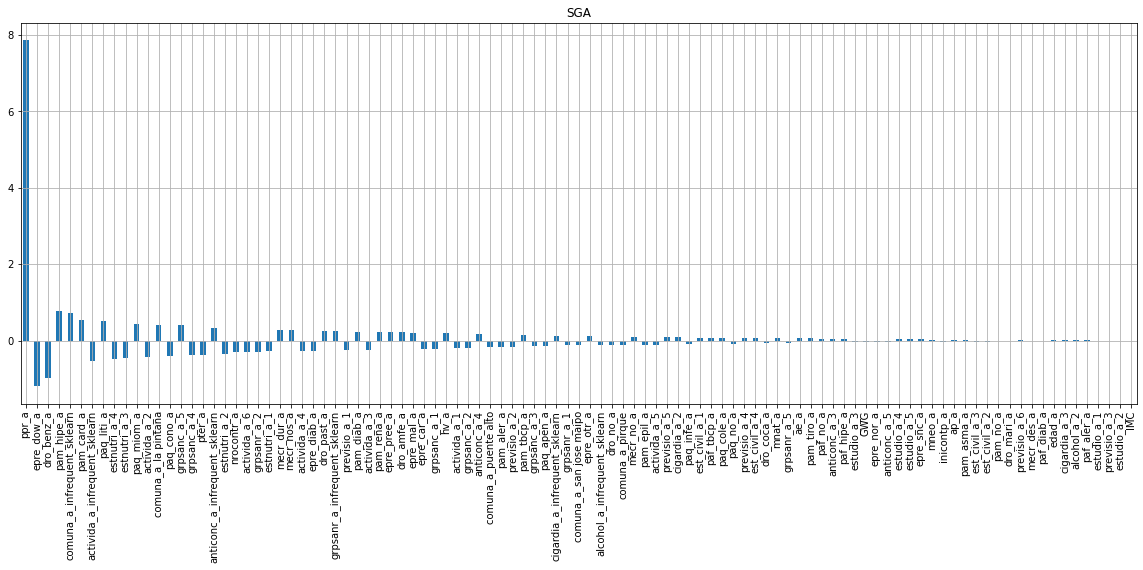

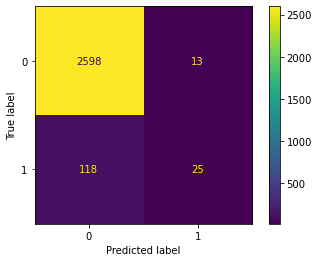

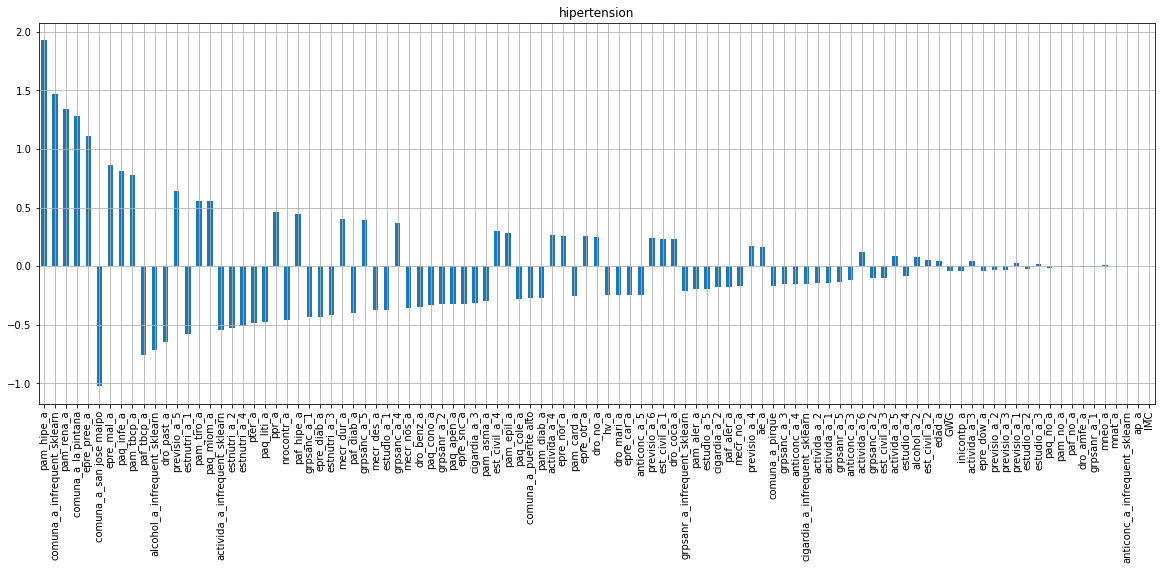

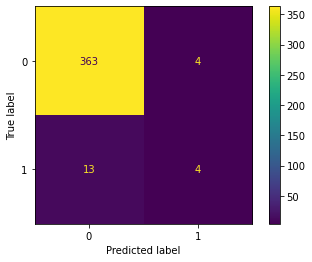

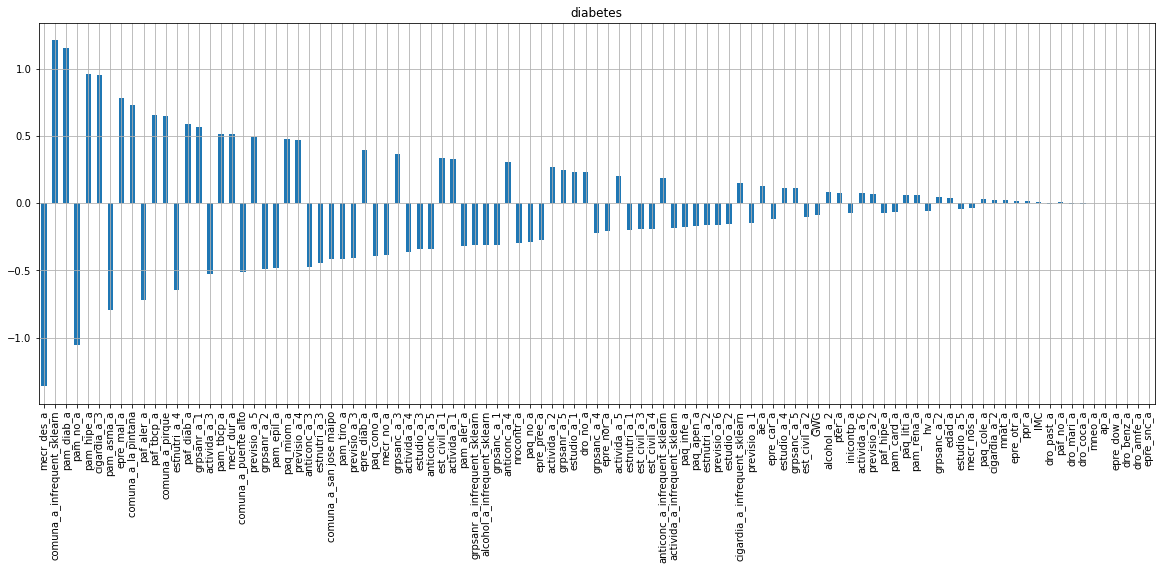

In [40]:
features = pickle.load(open(PATH_REPO / "data/models/features_names.pkl", "rb"))
targets = pickle.load(open(PATH_REPO / "data/models/targets_names.pkl", "rb"))

for t in targets:
    print("\n Target:", t)
    
    
    df_aux = data_dicts[t]
        
    X = df_aux[features]
    y = df_aux[t].apply(int)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    clf = LogisticRegression(random_state=1194, solver="liblinear").fit(X_train, y_train)
    print("Accuracy: {} %".format(clf.score(X_test, y_test)*100))
    y_pred = clf.predict(X_test)
    print("B. Accuracy: {} %".format(balanced_accuracy_score(y_test, y_pred)*100))
    
    plot_confusion_matrix(clf, X_test, y_test)
    var_imp = pd.DataFrame(clf.coef_, columns=features).T
    var_imp = var_imp.rename(columns={0:"val"})
    var_imp["abs"] = var_imp["val"].apply(abs)
    var_imp.sort_values(by=["abs"], ascending=False, inplace=True)
    var_imp.plot.bar(y="val", figsize=(20,7), legend=False, grid=True, title=t)